<a href="https://colab.research.google.com/github/jewoolee0502/ComputerVision/blob/main/ECSE415_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECSE 415: Introduction to Computer Vision
Jewoo Lee - 260910789

## Assignment 2: Feature Matching, Image Alignment

### Library Requirements

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


#### Path

In [4]:
path = '/content/drive/MyDrive/McGill/2025/Fall 2025/ECSE 415/A2/'

### 1. Harris Corner Detection

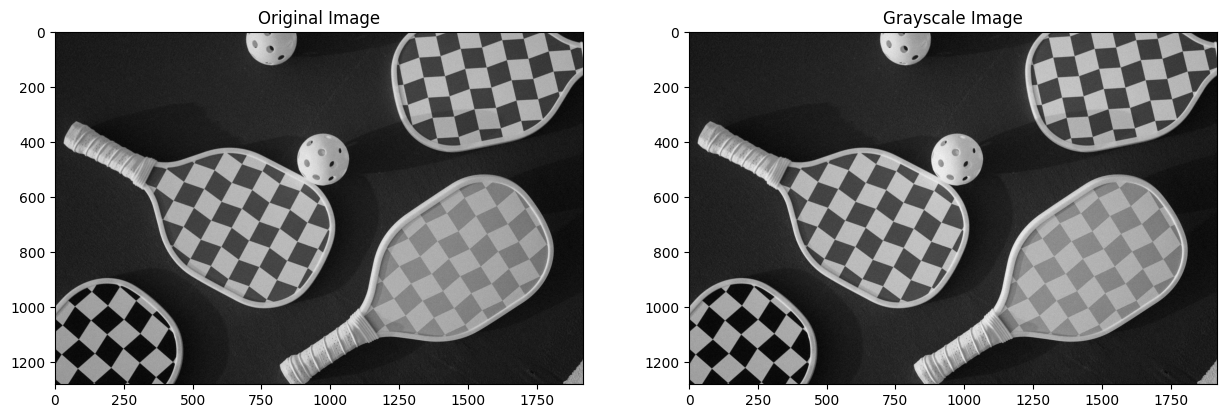

In [27]:
# load and plot the original image since the original image is already grayscale
img = cv2.imread(path + "checkered_pickleball_paddles.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title('Original Image')

axes[1].imshow(img_gray, cmap='gray')
axes[1].set_title('Grayscale Image')

plt.show()

#### 1.1 Implement Harris Corner Detection

In [38]:
def non_max_suppression(img):
  M, N = img.shape
  suppressed = np.zeros_like(img)
  for i in range(1, M-1):
    for j in range(1, N-1):
      if img[i, j] >= img[i-1:i+2, j-1:j+2].max():
        suppressed[i, j] = img[i, j]
      else:
        suppressed[i, j] = 0

  return suppressed

def harris_corner_detection(img, alpha=0.05, threshold=1):
  if img.ndim != 2:
    raise ValueError("Input image must be 2-dimensional (grayscale) image")

  img = cv2.GaussianBlur(img, (5, 5), 0) # gaussian blur the image

  # sobel derivatives
  Kx = np.array([ [-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]], dtype=np.float32)
  Ky = np.array([ [-1, -2, -1],
                  [ 0,  0,  0],
                  [ 1,  2,  1]], dtype=np.float32)

  I_x = cv2.filter2D(img, ddepth=cv2.CV_32F, kernel=Kx, borderType=cv2.BORDER_REFLECT)
  I_y = cv2.filter2D(img, ddepth=cv2.CV_32F, kernel=Ky, borderType=cv2.BORDER_REFLECT)

  # product of image derivatives
  I_xx = np.square(I_x)
  I_yy = np.square(I_y)
  I_xy = I_x * I_y

  # apply gaussian filtering
  I_xx_smooth = cv2.GaussianBlur(I_xx, (5, 5), 0)
  I_yy_smooth = cv2.GaussianBlur(I_yy, (5, 5), 0)
  I_xy_smooth = cv2.GaussianBlur(I_xy, (5, 5), 0)

  # apply corner response function -> R = det(M) - alpha * (trace(M))^2
  det_M = I_xx_smooth * I_yy_smooth - np.square(I_xy_smooth)
  trace_M = I_xx_smooth + I_yy_smooth
  R = det_M - alpha * np.square(trace_M)

  # non-maximum suppression
  nms = non_max_suppression(R)

  # normalize
  cv2.normalize(nms, nms, 0, 1, cv2.NORM_MINMAX)

  # apply threshold
  corners = np.where(nms >= threshold)

  # # mark the local maxima
  # for pt in zip(*corners[::-1]):
  #   cv2.circle(img, pt, 5, (255, 0, 0), -1)

  return corners

#### 1.2 Visualize Harris Corners

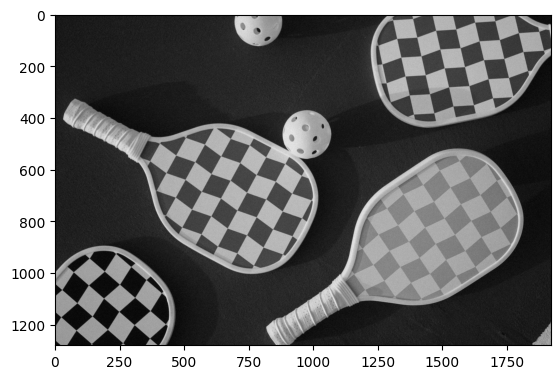

In [39]:
def visualize_corners(img, corners):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_disp = img.copy()

  for pt in zip(*corners[::-1]):
    cv2.circle(img_disp, pt, 5, (255, 0, 0), 1)

  plt.imshow(img_disp, cmap='gray')
  plt.show()

  return

visualize_corners(img, harris_corner_detection(img_gray))

#### 1.3 Threshold Exploration

In [37]:
threshold_list = [0.1, 0.5, 0.75, 0.9, 1.0, 1.1, 1.25, 1.5, 2]

Discussion:



#### 1.4 Harris Corners in Transformed Images (Rotation and Scaling)

### 2. SIFT Feature Detection

#### 2.1 Implement SIFT Keypoint Detection and Matching

#### 2.2 SIFT Keypoints on Transformed Images (Rotation and Scaling)

### 3. Image Alignment

#### 3.1 Keypoint Detection and Matching

#### 3.2 Homography Estimation and Verification

#### 3.3 Image Stitching and Blending

#### 3.4 Evaluation and Reflection

Write a short paragraph discussing:

• How well your homography aligned the images.
• Whether you observed ghosting, seams, or misalignments.
• What could be improved.